In [5]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Advanced Visualization
import plotly.express as px
import plotly.graph_objects as go 

# Interactive Notebooks
%matplotlib inline
from IPython.display import display 

In [7]:
# Making a copy of the cleaned data
cleaned_data = pd.read_csv('../Data/Processed/cleaned_sales_data.csv')

In [10]:
data_copy = cleaned_data.copy()

# EDA and Answering some questions

In [11]:
data_copy.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,ship-state,ship-postal-code,ship-country,B2B,Month,Day,Year,day_of_week,Total_Sales,Is_Weekend
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,set,S,...,MAHARASHTRA,400081.0,IN,False,4,30,2022,5,0.0,1
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,KARNATAKA,560085.0,IN,False,4,30,2022,5,406.0,1
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,MAHARASHTRA,410210.0,IN,True,4,30,2022,5,329.0,1
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,western dress,L,...,PUDUCHERRY,605008.0,IN,False,4,30,2022,5,0.0,1
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,top,3XL,...,TAMIL NADU,600073.0,IN,False,4,30,2022,5,574.0,1


In [19]:
data_copy.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'Month', 'Day',
       'Year', 'day_of_week', 'Total_Sales', 'Is_Weekend'],
      dtype='object')

In [20]:
data_copy.shape

(128975, 26)

In [22]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      128975 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            128975 non-null  object 
 14  Amount              128975 non-null  float64
 15  ship-city           128942 non-nul

In [23]:
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Qty,128975.0,0.904431,0.313354,0.0,1.0,1.0,1.0,15.0
Amount,128975.0,648.561465,272.581240,0.0,459.0,635.0,771.0,5584.0
ship-postal-code,128942.0,463966.236509,191476.764941,110001.0,382421.0,500033.0,600024.0,989898.0
Month,128975.0,4.909192,0.818402,3.0,4.0,5.0,6.0,6.0
Day,128975.0,14.925978,8.742876,1.0,7.0,15.0,22.0,31.0
Year,128975.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0
day_of_week,128975.0,3.012088,2.026397,0.0,1.0,3.0,5.0,6.0
Total_Sales,128975.0,590.368023,388.161590,0.0,399.0,568.0,771.0,44672.0
Is_Weekend,128975.0,0.295739,0.456376,0.0,0.0,0.0,1.0,1.0


### <mark>Sales Analysis</mark>

#### 1. What is the total revenue generated over the given time frame?

In [26]:
total_revenue = data_copy['Amount'].sum()
print(f'Total Revenue generated over the given time frame is: INR {total_revenue:.3f}')

Total Revenue generated over the given time frame is: INR 83648214.918


In [30]:
cleaned_data['Amount'].describe()

count    128975.000000
mean        648.561465
std         272.581240
min           0.000000
25%         459.000000
50%         635.000000
75%         771.000000
max        5584.000000
Name: Amount, dtype: float64

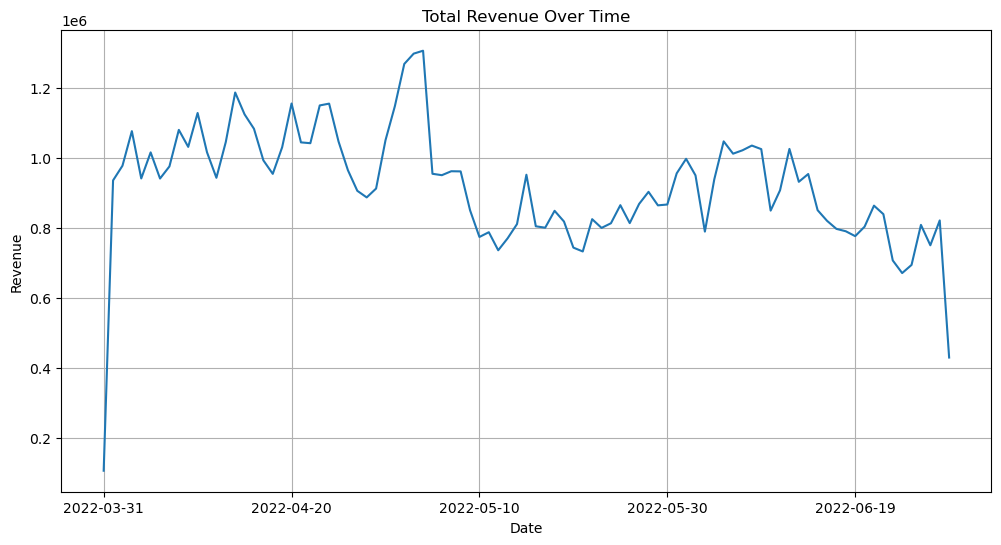

In [31]:
daily_revenue = data_copy.groupby('Date')['Amount'].sum()

plt.figure(figsize=(12, 6))
daily_revenue.plot()
plt.title('Total Revenue Over Time')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.grid(True)
plt.show()

### 2. How do sales trends look over time (daily, monthly, quarterly, yearly)?

In [41]:
total_sales_over_time = data_copy.groupby('Date')['Total_Sales'].sum().reset_index()

# Creating the plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=total_sales_over_time['Date'], 
                         y=total_sales_over_time['Total_Sales'],
                         mode='lines+markers',
                         name='Total Sales Over Time',
                         line=dict(color='maroon')))

fig.update_layout(title='Total Sales Over Time',
                  xaxis_title='Date',
                  yaxis_title='Total Sales')

fig.show()